In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go, plotly.express as px
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('campaign.csv')

In [3]:
df

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Complain,Gender,Phone,Year_Register,Month_Register,Total_Purchase,Payment_Method,Age,Status,Children
0,1001,1994.0,Graduation,61074.0,2021-08-17,37.0,790.0,2.0,133.0,0.0,...,0.0,Other,8.412036e+10,2021.0,8.0,31.0,Card,30.0,Married,1
1,1002,1989.0,Graduation,60093.0,2022-06-26,92.0,503.0,14.0,109.0,16.0,...,0.0,Male,8.494833e+10,2022.0,6.0,21.0,Mobile,35.0,Married,1
2,1005,1978.0,Master,79689.0,2022-05-12,65.0,312.0,28.0,640.0,180.0,...,0.0,Female,8.444028e+10,2022.0,5.0,27.0,Online,46.0,Single,0
3,1006,1987.0,Master,41021.0,2021-12-30,12.0,15.0,9.0,9.0,6.0,...,0.0,Female,8.494006e+10,2021.0,12.0,7.0,Online,37.0,Together,1
4,1007,1996.0,PhD,57333.0,2021-09-22,55.0,942.0,16.0,397.0,76.0,...,0.0,Male,8.433939e+10,2021.0,9.0,33.0,Card,28.0,Divorced,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,9980,1992.0,Graduation,22010.0,2022-06-30,51.0,12.0,4.0,9.0,3.0,...,0.0,Male,8.464713e+10,2022.0,6.0,7.0,Online,32.0,Together,1
2232,9985,1986.0,Graduation,38361.0,2022-12-27,74.0,40.0,2.0,56.0,20.0,...,0.0,Female,8.447441e+10,2022.0,12.0,10.0,Cash,38.0,Together,1
2233,9986,1990.0,Graduation,56628.0,2023-03-21,30.0,480.0,7.0,82.0,7.0,...,0.0,Male,8.489301e+10,2023.0,3.0,20.0,Mobile,34.0,Single,1
2234,9990,1993.0,Graduation,75330.0,2021-10-04,94.0,556.0,84.0,257.0,93.0,...,0.0,Other,8.457901e+10,2021.0,10.0,29.0,Online,31.0,Married,2


* After dataset was cleaned, dataset has 31 columns and 2236 rows.

In [4]:
df.columns

Index(['ID', 'Year_Of_Birth', 'Academic_Level', 'Income', 'Registration_Time',
       'Recency', 'Liquor', 'Vegetables', 'Pork', 'Seafood', 'Candy',
       'Jewellery', 'Num_Deals_Purchases', 'Num_Web_Purchases',
       'Num_Catalog_Purchases', 'Num_Store_Purchases', 'Num_Web_Visits_Month',
       'Promo_30', 'Promo_50', 'Promo_10', 'Promo_20', 'Complain', 'Gender',
       'Phone', 'Year_Register', 'Month_Register', 'Total_Purchase',
       'Payment_Method', 'Age', 'Status', 'Children'],
      dtype='object')

## Campaign Participation

Let's evaluate campaign participation in general to find my problem in past campaignns

In [5]:
totalpromo = df[['Promo_10', 'Promo_20', 'Promo_30', 'Promo_50']].apply(pd.value_counts).transpose()

C:\Users\levob\AppData\Local\Temp\ipykernel_25572\3159367104.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  totalpromo = df[['Promo_10', 'Promo_20', 'Promo_30', 'Promo_50']].apply(pd.value_counts).transpose()


In [6]:
totalpromo

,0.0,1.0
Promo_10,2093,143
Promo_20,2206,30
Promo_30,2073,163
Promo_50,2206,30


First, we must count total participation in each campaign
* 0, as the data described before in glossary, represents that the participant **didn't** participate in the campaign.
* 1, represents that the participant did participate in the campaign. 

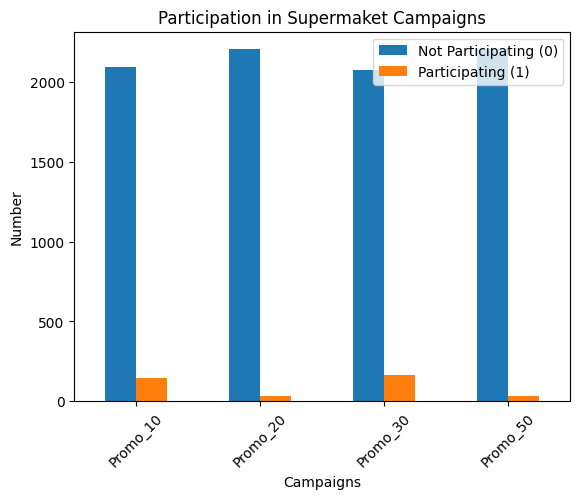

In [7]:
totalpromo.plot(kind='bar')
plt.xlabel('Campaigns')
plt.ylabel('Number')
plt.title('Participation in Supermaket Campaigns')
plt.legend(['Not Participating (0)', 'Participating (1)'])
plt.xticks(rotation = 45)
plt.show()

In [8]:
df['freqJoin'] = df[['Promo_10', 'Promo_20', 'Promo_30', 'Promo_50']].sum(axis = 1)

In [9]:
df['freqJoin'].value_counts()

freqJoin
0.0    1941
1.0     244
2.0      34
3.0      14
4.0       3
Name: count, dtype: int64

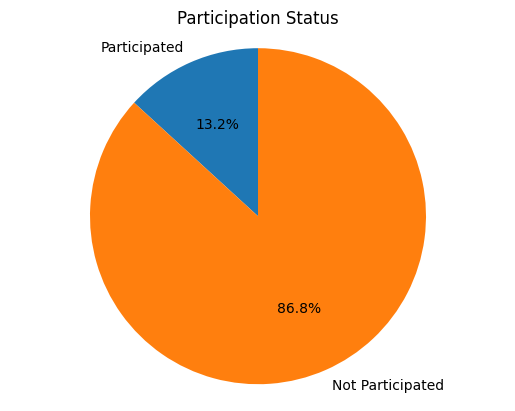

In [10]:
dictParticipated = {'type': ['Participated', 'Not Participated'],
                    'count': [df[df['freqJoin']!= 0]['ID'].count(), df[df['freqJoin'] == 0]['ID'].count()]}
hasParticipated = pd.DataFrame(dictParticipated)
plt.pie(hasParticipated['count'], labels=hasParticipated['type'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Participation Status')
plt.show()

,type,count
0,Participated,1.240678
1,Not Participated,3.759322


<Axes: >

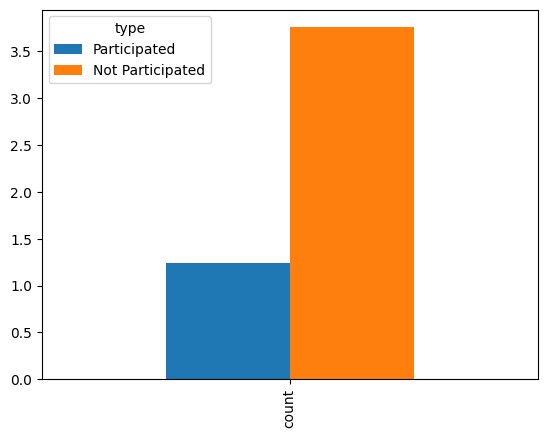

In [11]:
dictParticipationRate = {'type' : ['Participated' , 'Not Participated'],
                         'count' : [df[df['freqJoin'] != 0]['freqJoin'].mean(), 5 - df[df['freqJoin'] != 0]['freqJoin'].mean()]}
allParticipationRate = pd.DataFrame(dictParticipationRate)
display(allParticipationRate)
allParticipationRate.set_index('type').transpose().plot.bar(stacked=False)

### The Problems
**So many customers didn't participate in the campaigns and only 13.2% has participated.**

But, if we look closely in participated customers number, there's a hope that this campaigns could work better next time. In the 3rd campaigns, we see a significance rise in participants, doubles the last and overall past campaigns participants.

To best formulate next campaign, we should design the campaign carefully based our evaluation of past campaigns.

We should see what might happened in last campaign to formulate next campaigns. And also, looks at 2nd and 5th campaigns that failed to gather participants, so we're not repeating same mistake in next campaigns.

Based on our given data, we can see the demographics for potential target audience, so many will participate in next campaign.

We can try to integrate discount into campaign.

We can boost one of our channel of purchase for effective campaign.

>**First thing first, we should decide who's our best target audience?**

### DEMOGRAPHIC EDA
Based on our given data, we can do some demographic analysis 
We can analyze through Generation, Education, Status, Ecomonic Class, Family categories.
We will try to find what happened there based on the proportion and find the best option for each demography type.

* Income Grouping

In [12]:
def incomeGrouper(x) :
    if x > 500000 :
        return 'Upper Class'
    elif x >= 100000 and x <= 500000 :
        return 'Upper Middle Class'
    elif x >= 35000 and x < 100000 :
        return 'Lower Middle Class'
    elif x >= 16000 and x < 35000 :
        return 'Working Class'
    elif x < 16000 :
        return 'Lower Class'

In [13]:
df['ecoClass'] = df['Income'].apply(incomeGrouper)

In [14]:
df['ecoClass'].value_counts()

ecoClass
Lower Middle Class    1674
Working Class          484
Lower Class             65
Upper Middle Class      12
Upper Class              1
Name: count, dtype: int64

* Generations Class

In [15]:
from datetime import date

In [16]:
def yearDefiner(x) :
    if x <= 1924 :
        return 'Greatest Generation'
    elif x >= 1925 and x <= 1945 :
        return 'Silent Generation'
    elif x >= 1946 and x <= 1964 :
        return 'Baby Boomers'
    elif x >= 1965 and x <= 1980 :
        return 'Gen X'
    elif x >= 1981 and x <= 1996 :
        return 'Millennials'
    elif x >= 1997 and x <= 2012 :
        return 'Gen Z'
    elif x >= 2013 and x <= 2025 :
        return 'Gen A'

In [17]:
df['Generation'] = df['Year_Of_Birth'].apply(yearDefiner)

In [18]:
df['Generation'].value_counts()

Generation
Millennials    1994
Gen X           151
Gen Z            91
Name: count, dtype: int64

In [19]:

df['isChildren'] = np.where((df['Children'] == 0), 'Not Family', 'Family')

* Total Amount Spent

In [20]:
df['TotalSpent'] = df[['Liquor','Vegetables', 'Pork', 'Seafood', 'Candy']].sum(axis = 1)


Campaign participation is the main variable in this analysis
The colums are separated based on each campaign.
Later, we should count participation in total per customer to make analysis per demography / other categories.
So, we should create a new column that contains sum participation per customer to make the analysis easier.

* Total Times Purchase

In [21]:
df['frePurchase'] = df[['Num_Deals_Purchases', 'Num_Web_Purchases', 'Num_Catalog_Purchases', 'Num_Store_Purchases']].sum(axis=1)

#### ***GENERATION***
We will try to find which generation participate most in the campaign to see the problems that happended and what are the best generation to be targeted in the next campaign.

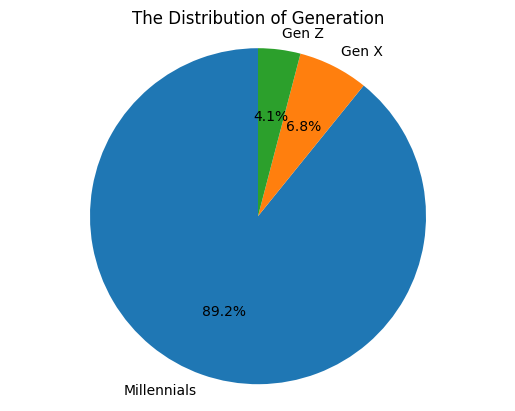

In [22]:
piegen = df['Generation'].value_counts()
piegen = pd.DataFrame(piegen).reset_index()
plt.pie(piegen['count'], labels=piegen['Generation'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('The Distribution of Generation')
plt.show()

In [23]:
piegen

,Generation,count
0,Millennials,1994
1,Gen X,151
2,Gen Z,91


**Two biggest gen pool**
* Millennials: 89.2% with 1994 people.
* Gen X: 6.8% with 151 people.

These are the most potential generation to be targeted in the next campaign

#### COMPARE PARTICIPANT IN EACH CAMPAIGN - EVALUATION 
We should look into composition of participants per campaign
This way, we can tell which is the most potential generation to target and which generation gives interest to past campaigns

In [24]:
crossTabGenCmp1 = pd.crosstab(index = df['Generation'],
                          columns= df['Promo_10']).reset_index().rename({0 : '0Cmp1', 1 : '1Cmp1'}, axis = 1)
crossTabGenCmp2 = pd.crosstab(index = df['Generation'],
                          columns= df['Promo_20']).reset_index().rename({0 : '0Cmp2', 1 : '1Cmp2'}, axis = 1)
crossTabGenCmp3 = pd.crosstab(index = df['Generation'],
                          columns= df['Promo_30']).reset_index().rename({0 : '0Cmp3', 1 : '1Cmp3'}, axis = 1)
crossTabGenCmp5 = pd.crosstab(index = df['Generation'],
                          columns= df['Promo_50']).reset_index().rename({0 : '0Cmp5', 1 : '1Cmp5'}, axis = 1)
crossTabGenCmpAll = pd.crosstab(index = df['Generation'],
                          columns= df['freqJoin'].apply(lambda x: 0 if x == 0 else 1)).reset_index().rename({0 : '0CmpAll', 1 : '1CmpAll'}, axis = 1)
crossTabGenFull = crossTabGenCmp1.merge(crossTabGenCmp2, on='Generation') \
                                .merge(crossTabGenCmp3, on='Generation') \
                                .merge(crossTabGenCmp5, on='Generation') \
                                .merge(crossTabGenCmpAll, on='Generation') 
crossTabGenFull = crossTabGenFull.merge(piegen.rename({'index' : 'Generation'}, axis = 1),'inner','Generation')
crossTabGenFull['1Cmp1Prop'] = (crossTabGenFull['1Cmp1'] / crossTabGenFull['count']) * 100
crossTabGenFull['1Cmp2Prop'] = (crossTabGenFull['1Cmp2'] / crossTabGenFull['count']) * 100
crossTabGenFull['1Cmp3Prop'] = (crossTabGenFull['1Cmp3'] / crossTabGenFull['count']) * 100
crossTabGenFull['1Cmp5Prop'] = (crossTabGenFull['1Cmp5'] / crossTabGenFull['count']) * 100
crossTabGenFull['1CmpAllProp'] = (crossTabGenFull['1CmpAll'] / crossTabGenFull['count']) * 100
crossTabGenFull

,Generation,0Cmp1,1Cmp1,0Cmp2,1Cmp2,0Cmp3,1Cmp3,0Cmp5,1Cmp5,0CmpAll,1CmpAll,count,1Cmp1Prop,1Cmp2Prop,1Cmp3Prop,1Cmp5Prop,1CmpAllProp
0,Gen X,143,8,150,1,135,16,150,1,127,24,151,5.298013,0.662252,10.596026,0.662252,15.894040
1,Gen Z,82,9,89,2,85,6,89,2,78,13,91,9.890110,2.197802,6.593407,2.197802,14.285714
2,Millennials,1868,126,1967,27,1853,141,1967,27,1736,258,1994,6.318957,1.354062,7.071214,1.354062,12.938816


* Here, basically we just make a crosstabulation to count frequency of each participation per campaign
* The tables are separated by 2 type of count.
* The first one (left side) is count of 0 (not participated) and 1 (participated) per generation.
* In the middle (count) is total population per generation. So, we can calculate the proportion of participation per generation.
* The second one (right side) is proportion of participation per generation, calculated by participation count / population count per generation.

This way we can conclude which generation shape the whole campaign and which generation has more interest to the campaign.

In [25]:
crossTabGenFullPartiCount = crossTabGenFull[['Generation','1Cmp1', '1Cmp2', '1Cmp3', '1Cmp5', '1CmpAll']]
crossTabGenFullPartiCount

,Generation,1Cmp1,1Cmp2,1Cmp3,1Cmp5,1CmpAll
0,Gen X,8,1,16,1,24
1,Gen Z,9,2,6,2,13
2,Millennials,126,27,141,27,258


In [26]:
crossTabGenFullPartiProp = crossTabGenFull[['Generation','1Cmp1Prop', '1Cmp2Prop', '1Cmp3Prop', '1Cmp5Prop', '1CmpAllProp']]
crossTabGenFullPartiProp

,Generation,1Cmp1Prop,1Cmp2Prop,1Cmp3Prop,1Cmp5Prop,1CmpAllProp
0,Gen X,5.298013,0.662252,10.596026,0.662252,15.894040
1,Gen Z,9.890110,2.197802,6.593407,2.197802,14.285714
2,Millennials,6.318957,1.354062,7.071214,1.354062,12.938816


Separate the table into two tables to make a visualization for composition of participant per campaign

* First table is count table, how much participant per campaign per generation.
This will tell which generation shape the majority of campaign participant.

* Second table is proportion table, how much proportion per generation that participated in campaigns.
This will tell which generation take interest more in the campaigns because majority of population of that generation has participated.

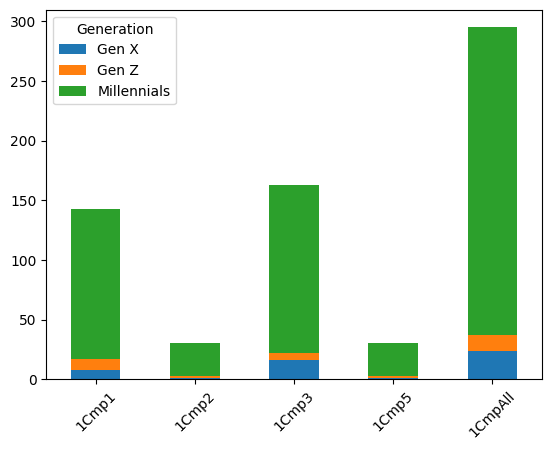

In [27]:
crossTabGenFullPartiCount.set_index('Generation').transpose().plot.bar(stacked = True)
plt.xticks(rotation = 45)
plt.show()

* Millennials is the biggest to have participated in campaigns

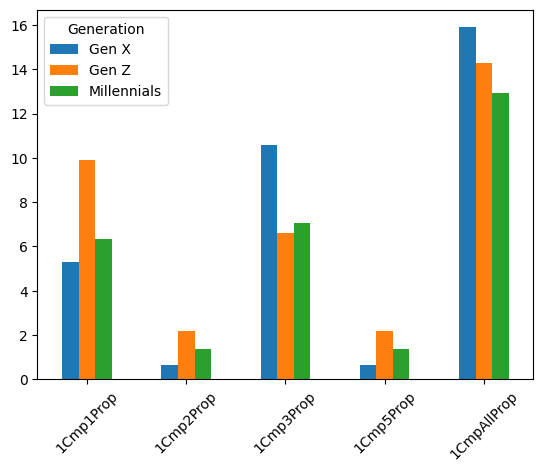

In [28]:
crossTabGenFullPartiProp.set_index('Generation').transpose().plot.bar(stacked = False)
plt.xticks(rotation = 45)
plt.show()

* Based on top population, we can conclude that Millennials has biggest pool and shape the participant per campaign 
* But, the interest seems not clear which generation took more interest in the campaigns, but tends a bit towards GenX

#### DETAILS

*All Campaign?*

In [29]:
filtered_df = df[df['freqJoin'] != 0]
generation_counts = filtered_df['Generation'].value_counts()

In [30]:
generation_counts.reset_index()

,Generation,count
0,Millennials,258
1,Gen X,24
2,Gen Z,13


In [31]:
generation_counts = pd.merge(generation_counts, piegen, on = 'Generation', how = 'inner')

In [32]:
generation_counts

,Generation,count_x,count_y
0,Millennials,258,1994
1,Gen X,24,151
2,Gen Z,13,91


In [33]:
generation_counts['%Percent'] = generation_counts['count_x']*100/generation_counts['count_y']
generation_counts['%Percent'] = generation_counts['%Percent'].sort_values(ascending=False)

In [34]:
generation_counts

,Generation,count_x,count_y,%Percent
0,Millennials,258,1994,12.938816
1,Gen X,24,151,15.894040
2,Gen Z,13,91,14.285714


* 15.89% Gen X / 24 people of 151 people have participated
* 14.29% GenZ / 13 people of 91 people have participated
* 12.94% Millenials / 258 people of 1994 people have participated

*5th Campaign?*

In [35]:
filtered_df = df[df['Promo_50'] != 0]
generation_counts_5 = filtered_df['Generation'].value_counts()
generation_counts_5.reset_index()
generation_counts_5 = pd.merge(generation_counts_5, piegen, on = 'Generation', how = 'inner')
generation_counts_5['%Percent'] = generation_counts_5['count_x']*100/generation_counts_5['count_y']
generation_counts_5['%Percent'] = generation_counts_5['%Percent'].sort_values(ascending=False)
generation_counts_5

,Generation,count_x,count_y,%Percent
0,Millennials,27,1994,1.354062
1,Gen Z,2,91,2.197802
2,Gen X,1,151,0.662252


* 2.2% GenZ / 2 people of 91 people have participated
* 1.35% Millennials / 27 people of 1994 people have participated
* 0.66% GenX / 1 people of 151 people have participated

*3nd Campaign?*

In [36]:
filtered_df = df[df['Promo_30'] != 0]
generation_counts_3 = filtered_df['Generation'].value_counts()
generation_counts_3.reset_index()
generation_counts_3 = pd.merge(generation_counts_3, piegen, on = 'Generation', how = 'inner')
generation_counts_3['%Percent'] = generation_counts_3['count_x']*100/generation_counts_3['count_y']
generation_counts_3['%Percent'] = generation_counts_3['%Percent'].sort_values(ascending=False)
generation_counts_3

,Generation,count_x,count_y,%Percent
0,Millennials,141,1994,7.071214
1,Gen X,16,151,10.596026
2,Gen Z,6,91,6.593407


* 6.59% GenZ / 6 people of 91 people have participated
* 7.07% Millennials / 141 people of 1994 people have participated
* 10.59% GenX / 16 people of 151 people have participated

### OVERALL CONCLUSION OF AGE
1. Based on proportion, Millennials, Gen X has the highest proportion of general Age Demographics. Those 2 are the most potential to be digged on.
2. Most of the campaign participants, based on the proportion, always have Gen X (15.89%) as the highest proportion followed by Millennials(12.94%) and then Gen Z(14.29%).
3. Millennials is the largest pool of population but don't participate as much as other categories. It means, the potentiality is wasted.

#### ***EDUCATION***
We will try to find which education participate most in the campaign to see the problems that happened and what are the best education to be targeted in the next campaign

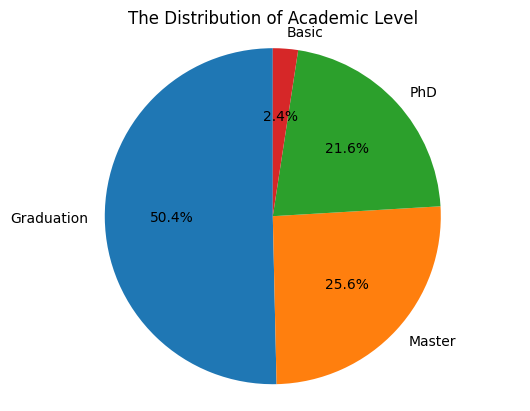

In [37]:
pieedu = df['Academic_Level'].value_counts()
pieedu = pd.DataFrame(pieedu).reset_index()
plt.pie(pieedu['count'], labels=pieedu['Academic_Level'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('The Distribution of Academic Level')
plt.show()

In [38]:
pieedu

,Academic_Level,count
0,Graduation,1126
1,Master,572
2,PhD,484
3,Basic,54


*Top 3 Academic Level*
1. Graduation: 50.4% / 1126 people.
2. Master: 25.6% / 572 people.
3. PhD: 21.1% / 484 people.

These are the most potential education to be targeted in the next campaign

#### COMPARE PARTICIPANT IN EACH CAMPAIGN - EVALUATION 
* We should look into composition of participants per campaign
* This way, we can tell which is the most potential generation to target and which generation gives interest to past campaigns

In [39]:
crossTabGenCmp1 = pd.crosstab(index = df['Academic_Level'],
                          columns= df['Promo_10']).reset_index().rename({0 : '0Cmp1', 1 : '1Cmp1'}, axis = 1)
crossTabGenCmp2 = pd.crosstab(index = df['Academic_Level'],
                          columns= df['Promo_20']).reset_index().rename({0 : '0Cmp2', 1 : '1Cmp2'}, axis = 1)
crossTabGenCmp3 = pd.crosstab(index = df['Academic_Level'],
                          columns= df['Promo_30']).reset_index().rename({0 : '0Cmp3', 1 : '1Cmp3'}, axis = 1)
crossTabGenCmp5 = pd.crosstab(index = df['Academic_Level'],
                          columns= df['Promo_50']).reset_index().rename({0 : '0Cmp5', 1 : '1Cmp5'}, axis = 1)
crossTabGenCmpAll = pd.crosstab(index = df['Academic_Level'],
                          columns= df['freqJoin'].apply(lambda x: 0 if x == 0 else 1)).reset_index().rename({0 : '0CmpAll', 1 : '1CmpAll'}, axis = 1)
crossTabGenFull = crossTabGenCmp1.merge(crossTabGenCmp2, on='Academic_Level') \
                                .merge(crossTabGenCmp3, on='Academic_Level') \
                                .merge(crossTabGenCmp5, on='Academic_Level') \
                                .merge(crossTabGenCmpAll, on='Academic_Level') 
crossTabGenFull = crossTabGenFull.merge(pieedu.rename({'index' : 'Academic_Level'}, axis = 1),'inner','Academic_Level')
crossTabGenFull['1Cmp1Prop'] = (crossTabGenFull['1Cmp1'] / crossTabGenFull['count']) * 100
crossTabGenFull['1Cmp2Prop'] = (crossTabGenFull['1Cmp2'] / crossTabGenFull['count']) * 100
crossTabGenFull['1Cmp3Prop'] = (crossTabGenFull['1Cmp3'] / crossTabGenFull['count']) * 100
crossTabGenFull['1Cmp5Prop'] = (crossTabGenFull['1Cmp5'] / crossTabGenFull['count']) * 100
crossTabGenFull['1CmpAllProp'] = (crossTabGenFull['1CmpAll'] / crossTabGenFull['count']) * 100
crossTabGenFull

,Academic_Level,0Cmp1,1Cmp1,0Cmp2,1Cmp2,0Cmp3,1Cmp3,0Cmp5,1Cmp5,0CmpAll,1CmpAll,count,1Cmp1Prop,1Cmp2Prop,1Cmp3Prop,1Cmp5Prop,1CmpAllProp
0,Basic,54,0,54,0,48,6,54,0,48,6,54,0.000000,0.000000,11.111111,0.000000,11.111111
1,Graduation,1045,81,1110,16,1048,78,1110,16,973,153,1126,7.193606,1.420959,6.927176,1.420959,13.587922
2,Master,540,32,568,4,533,39,568,4,508,64,572,5.594406,0.699301,6.818182,0.699301,11.188811
3,PhD,454,30,474,10,444,40,474,10,412,72,484,6.198347,2.066116,8.264463,2.066116,14.876033


* Here, basically we just make a crosstabulation to count frequency of each participation per campaign
* The tables are separated by 2 type of count.
* The first one (left side) is count of 0 (not participated) and 1 (participated) per education.
* In the middle (count) is total population per education. So, we can calculate the proportion of participation per education.
The second one (right side) is proportion of participation per education, calculated by participation count / population count per education.

This way we can conclude which education shape the whole campaign and which education has more interest to the campaign.

In [40]:
crossTabGenFullPartiCount = crossTabGenFull[['Academic_Level','1Cmp1', '1Cmp2', '1Cmp3', '1Cmp5', '1CmpAll']]
crossTabGenFullPartiCount

,Academic_Level,1Cmp1,1Cmp2,1Cmp3,1Cmp5,1CmpAll
0,Basic,0,0,6,0,6
1,Graduation,81,16,78,16,153
2,Master,32,4,39,4,64
3,PhD,30,10,40,10,72


In [41]:
crossTabGenFullPartiProp = crossTabGenFull[['Academic_Level','1Cmp1Prop', '1Cmp2Prop', '1Cmp3Prop', '1Cmp5Prop', '1CmpAllProp']]
crossTabGenFullPartiProp

,Academic_Level,1Cmp1Prop,1Cmp2Prop,1Cmp3Prop,1Cmp5Prop,1CmpAllProp
0,Basic,0.000000,0.000000,11.111111,0.000000,11.111111
1,Graduation,7.193606,1.420959,6.927176,1.420959,13.587922
2,Master,5.594406,0.699301,6.818182,0.699301,11.188811
3,PhD,6.198347,2.066116,8.264463,2.066116,14.876033


Separeate the table into two tables to make a visualization for composition of participant per campaign.

First table is count table, how much participant per campaign per education.
This will tell which education shape the majority of campaign participant.

Second table is proportion table, how much proportion per education that participated in campaigns.

This will tell which education take interest more in the campaigns because majority of population of that education has participated.


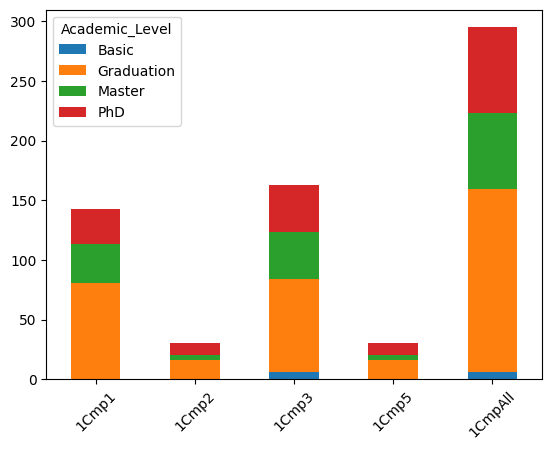

In [42]:
crossTabGenFullPartiCount.set_index('Academic_Level').transpose().plot.bar(stacked = True)
plt.xticks(rotation = 45)
plt.show()

Graduation is the biggest to have participated in Campaigns

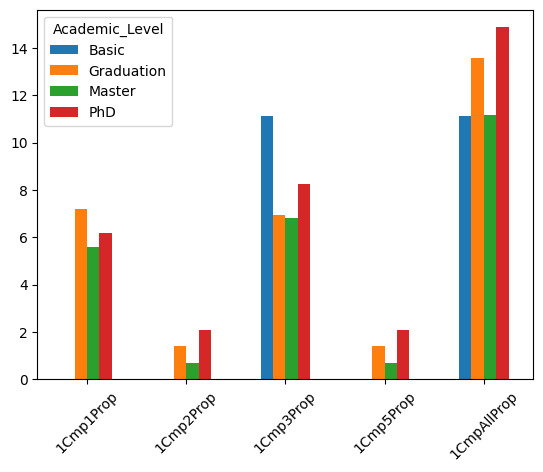

In [43]:
crossTabGenFullPartiProp.set_index('Academic_Level').transpose().plot.bar(stacked = False)
plt.xticks(rotation = 45)
plt.show()

Based on top population, we can conclude that Graduation has biggest pool and shape the participant per campaign

But, the interest seems not clear which education took more interest in the campaigns, but tends a bit towards PhD

*All Campaign?*

In [44]:
filtered_df = df[df['freqJoin'] != 0]
generation_counts = filtered_df['Academic_Level'].value_counts()
generation_counts.reset_index()
generation_counts = pd.merge(generation_counts, pieedu, on = 'Academic_Level', how = 'inner')
generation_counts

,Academic_Level,count_x,count_y
0,Graduation,153,1126
1,PhD,72,484
2,Master,64,572
3,Basic,6,54


In [45]:
generation_counts['%Percent'] = generation_counts['count_x']*100/generation_counts['count_y']
generation_counts['%Percent'] = generation_counts['%Percent'].sort_values(ascending=False)
generation_counts

,Academic_Level,count_x,count_y,%Percent
0,Graduation,153,1126,13.587922
1,PhD,72,484,14.876033
2,Master,64,572,11.188811
3,Basic,6,54,11.111111


* 14.88% PhD / 72 people of 484 people have participated
* 13.59% Graduation / 153 people of 1126 people have participated
* 11.19% Master / 64 people of 572 people have participated

*5th Campaign?*

In [46]:
filtered_df = df[df['Promo_50'] != 0]
generation_counts_5 = filtered_df['Academic_Level'].value_counts()
generation_counts_5.reset_index()
generation_counts_5 = pd.merge(generation_counts_5, pieedu, on = 'Academic_Level', how = 'inner')
generation_counts_5['%Percent'] = generation_counts_5['count_x']*100/generation_counts_5['count_y']
generation_counts_5['%Percent'] = generation_counts_5['%Percent'].sort_values(ascending=False)
generation_counts_5

,Academic_Level,count_x,count_y,%Percent
0,Graduation,16,1126,1.420959
1,PhD,10,484,2.066116
2,Master,4,572,0.699301


* 2.07% PhD / 10 people of 484 people have participated
* 1.42% Graduation / 16 people of 1126 people have participated
* 0.7% Master / 4 people of 572 people have participated

*3rd Campaign?*

In [47]:
filtered_df = df[df['Promo_30'] != 0]
generation_counts_3 = filtered_df['Academic_Level'].value_counts()
generation_counts_3.reset_index()
generation_counts_3 = pd.merge(generation_counts_3, pieedu, on = 'Academic_Level', how = 'inner')
generation_counts_3['%Percent'] = generation_counts_3['count_x']*100/generation_counts_3['count_y']
generation_counts_3['%Percent'] = generation_counts_3['%Percent'].sort_values(ascending=False)
generation_counts_3

,Academic_Level,count_x,count_y,%Percent
0,Graduation,78,1126,6.927176
1,PhD,40,484,8.264463
2,Master,39,572,6.818182
3,Basic,6,54,11.111111


* 8.26% PhD / 40 people of 484 people have participated
* 6.93% Graduation / 78 people of 1126 people have participated
* 6.82% Master / 39 people of 572 people have participated

#### **OVERALL CONCLUSION OF EDUCATION**
1. Based on proportion, Graduation, PhD, Master has the highest proportion of general Education Demographics. Those 3 are the most potential to be digged on.
2. Most of the campaign participants, based on the proportion, always have PhD (14.88%) as the highest proportion followed by Graduation (13.59%) and then Master (11.19%).
3. Graduation is the largest pool of population but don't participate as much as other categories. It means, the potentiality is wasted
4. Most of the campaigns seems to target PhD, but the PhD themselves are not the highest population pool.

### *STATUS MARITAL*

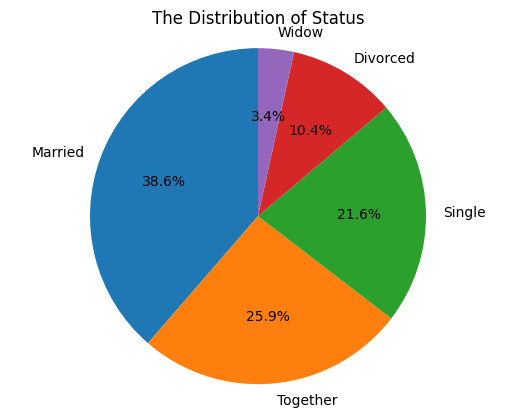

In [48]:
piestatus = df['Status'].value_counts()
piestatus = pd.DataFrame(piestatus).reset_index()
plt.pie(piestatus['count'], labels=piestatus['Status'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('The Distribution of Status')
plt.show()

In [49]:
piestatus

,Status,count
0,Married,864
1,Together,580
2,Single,483
3,Divorced,232
4,Widow,77


#### Top 3 Marital Status
* Married: 38.6% / 864 People
* Together: 25.9% / 580 People
* Single: 21.6% / 480 People

These are the most potential marital to be targeted in the next campaign

#### COMPARE PARTICIPANT IN EACH CAMPAIGN - EVALUATION 
* We should look into composition of participants per campaign
* This way, we can tell which is the most potential generation to target and which generation gives interest to past campaigns


In [50]:
crossTabGenCmp1 = pd.crosstab(index = df['Status'],
                          columns= df['Promo_10']).reset_index().rename({0 : '0Cmp1', 1 : '1Cmp1'}, axis = 1)
crossTabGenCmp2 = pd.crosstab(index = df['Status'],
                          columns= df['Promo_20']).reset_index().rename({0 : '0Cmp2', 1 : '1Cmp2'}, axis = 1)
crossTabGenCmp3 = pd.crosstab(index = df['Status'],
                          columns= df['Promo_30']).reset_index().rename({0 : '0Cmp3', 1 : '1Cmp3'}, axis = 1)
crossTabGenCmp5 = pd.crosstab(index = df['Status'],
                          columns= df['Promo_50']).reset_index().rename({0 : '0Cmp5', 1 : '1Cmp5'}, axis = 1)
crossTabGenCmpAll = pd.crosstab(index = df['Status'],
                          columns= df['freqJoin'].apply(lambda x: 0 if x == 0 else 1)).reset_index().rename({0 : '0CmpAll', 1 : '1CmpAll'}, axis = 1)
crossTabGenFull = crossTabGenCmp1.merge(crossTabGenCmp2, on='Status') \
                                .merge(crossTabGenCmp3, on='Status') \
                                .merge(crossTabGenCmp5, on='Status') \
                                .merge(crossTabGenCmpAll, on='Status') 
crossTabGenFull = crossTabGenFull.merge(piestatus,'inner','Status')
crossTabGenFull['1Cmp1Prop'] = (crossTabGenFull['1Cmp1'] / crossTabGenFull['count']) * 100
crossTabGenFull['1Cmp2Prop'] = (crossTabGenFull['1Cmp2'] / crossTabGenFull['count']) * 100
crossTabGenFull['1Cmp3Prop'] = (crossTabGenFull['1Cmp3'] / crossTabGenFull['count']) * 100
crossTabGenFull['1Cmp5Prop'] = (crossTabGenFull['1Cmp5'] / crossTabGenFull['count']) * 100
crossTabGenFull['1CmpAllProp'] = (crossTabGenFull['1CmpAll'] / crossTabGenFull['count']) * 100
crossTabGenFull

,Status,0Cmp1,1Cmp1,0Cmp2,1Cmp2,0Cmp3,1Cmp3,0Cmp5,1Cmp5,0CmpAll,1CmpAll,count,1Cmp1Prop,1Cmp2Prop,1Cmp3Prop,1Cmp5Prop,1CmpAllProp
0,Divorced,220,12,227,5,212,20,227,5,201,31,232,5.172414,2.155172,8.620690,2.155172,13.362069
1,Married,801,63,857,7,801,63,857,7,747,117,864,7.291667,0.810185,7.291667,0.810185,13.541667
2,Single,452,31,478,5,444,39,478,5,415,68,483,6.418219,1.035197,8.074534,1.035197,14.078675
3,Together,548,32,568,12,543,37,568,12,510,70,580,5.517241,2.068966,6.379310,2.068966,12.068966
4,Widow,72,5,76,1,73,4,76,1,68,9,77,6.493506,1.298701,5.194805,1.298701,11.688312


In [51]:
crossTabGenFull

,Status,0Cmp1,1Cmp1,0Cmp2,1Cmp2,0Cmp3,1Cmp3,0Cmp5,1Cmp5,0CmpAll,1CmpAll,count,1Cmp1Prop,1Cmp2Prop,1Cmp3Prop,1Cmp5Prop,1CmpAllProp
0,Divorced,220,12,227,5,212,20,227,5,201,31,232,5.172414,2.155172,8.620690,2.155172,13.362069
1,Married,801,63,857,7,801,63,857,7,747,117,864,7.291667,0.810185,7.291667,0.810185,13.541667
2,Single,452,31,478,5,444,39,478,5,415,68,483,6.418219,1.035197,8.074534,1.035197,14.078675
3,Together,548,32,568,12,543,37,568,12,510,70,580,5.517241,2.068966,6.379310,2.068966,12.068966
4,Widow,72,5,76,1,73,4,76,1,68,9,77,6.493506,1.298701,5.194805,1.298701,11.688312


In [52]:
crossTabGenFullPartiCount = crossTabGenFull[['Status','1Cmp1', '1Cmp2', '1Cmp3', '1Cmp5', '1CmpAll']]
crossTabGenFullPartiCount

,Status,1Cmp1,1Cmp2,1Cmp3,1Cmp5,1CmpAll
0,Divorced,12,5,20,5,31
1,Married,63,7,63,7,117
2,Single,31,5,39,5,68
3,Together,32,12,37,12,70
4,Widow,5,1,4,1,9


In [53]:
crossTabGenFullPartiProp = crossTabGenFull[['Status','1Cmp1Prop', '1Cmp2Prop', '1Cmp3Prop', '1Cmp5Prop', '1CmpAllProp']]
crossTabGenFullPartiProp

,Status,1Cmp1Prop,1Cmp2Prop,1Cmp3Prop,1Cmp5Prop,1CmpAllProp
0,Divorced,5.172414,2.155172,8.620690,2.155172,13.362069
1,Married,7.291667,0.810185,7.291667,0.810185,13.541667
2,Single,6.418219,1.035197,8.074534,1.035197,14.078675
3,Together,5.517241,2.068966,6.379310,2.068966,12.068966
4,Widow,6.493506,1.298701,5.194805,1.298701,11.688312


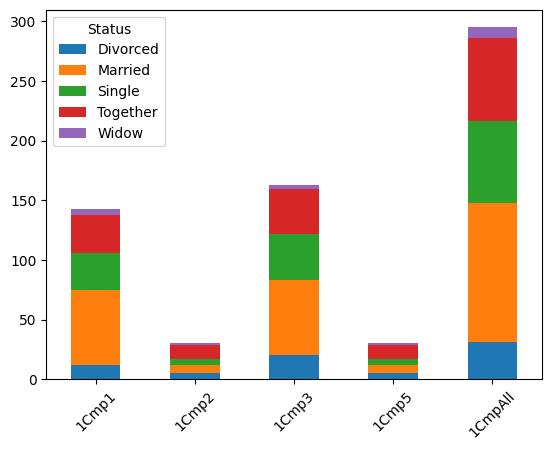

In [54]:
crossTabGenFullPartiCount.set_index('Status').transpose().plot.bar(stacked = True)
plt.xticks(rotation = 45)
plt.show()

* Most of the participant is Married
* 2nd and 5th Campaign are participated more by Together

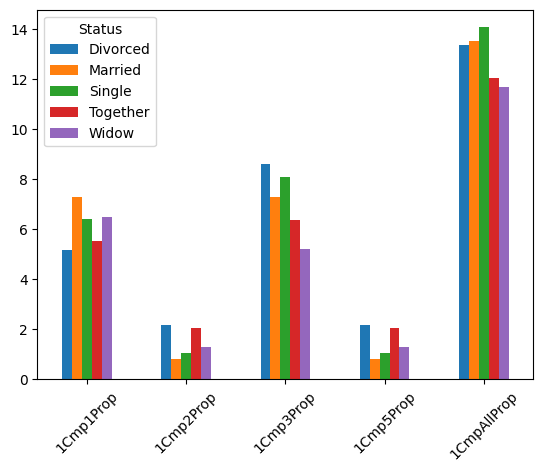

In [55]:
crossTabGenFullPartiProp.set_index('Status').transpose().plot.bar(stacked = False)
plt.xticks(rotation = 45)
plt.show()

* Based on top population, we can conclude that Married has biggest pool and shape the participant per campaign 
* But, the interest seems not clear which marital took more interest in the campaigns, but tends a bit towards Single

*All Campaigns?*

In [56]:
filtered_df = df[df['freqJoin'] != 0]
generation_counts = filtered_df['Status'].value_counts()

In [57]:
generation_counts = pd.merge(generation_counts, piestatus, on = 'Status', how = 'inner')
generation_counts['%Percent'] = generation_counts['count_x']*100/generation_counts['count_y']
generation_counts['%Percent'] = generation_counts['%Percent'].sort_values(ascending=False)
generation_counts

,Status,count_x,count_y,%Percent
0,Married,117,864,13.541667
1,Together,70,580,12.068966
2,Single,68,483,14.078675
3,Divorced,31,232,13.362069
4,Widow,9,77,11.688312


* 14.08% Single / 68 people of 483 people have participated
* 13.54% Married / 117 people of 864 people have participated
* 12.07% Together / 70 people of 580| people have participated

*5th Campaign?*

In [58]:
filtered_df = df[df['Promo_50'] != 0]
generation_counts_5 = filtered_df['Status'].value_counts()
generation_counts_5.reset_index()
generation_counts_5 = pd.merge(generation_counts_5, piestatus, on = 'Status', how = 'inner')
generation_counts_5['%Percent'] = generation_counts_5['count_x']*100/generation_counts_5['count_y']
generation_counts_5['%Percent'] = generation_counts_5['%Percent'].sort_values(ascending=False)
generation_counts_5

,Status,count_x,count_y,%Percent
0,Together,12,580,2.068966
1,Married,7,864,0.810185
2,Single,5,483,1.035197
3,Divorced,5,232,2.155172
4,Widow,1,77,1.298701


* 2.07% Together / 12 people of 580 people have particiapted 
* 0.81% Married / 7 people of 864 people have particiapted 
* 1.04% Single / 5 people of 483 people have particiapted 

*3rd Campaign?*

In [59]:
filtered_df = df[df['Promo_30'] != 0]
generation_counts_3 = filtered_df['Status'].value_counts()
generation_counts_3.reset_index()
generation_counts_3 = pd.merge(generation_counts_3, piestatus, on = 'Status', how = 'inner')
generation_counts_3['%Percent'] = generation_counts_3['count_x']*100/generation_counts_3['count_y']
generation_counts_3['%Percent'] = generation_counts_3['%Percent'].sort_values(ascending=False)
generation_counts_3

,Status,count_x,count_y,%Percent
0,Married,63,864,7.291667
1,Single,39,483,8.074534
2,Together,37,580,6.379310
3,Divorced,20,232,8.620690
4,Widow,4,77,5.194805


* 6.38% Together / 37 people of 580 people have particiapted 
* 7.29% Married / 63 people of 864 people have particiapted 
* 8.07% Single / 39 people of 483 people have particiapted 

#### OVERALL CONCLUSION OF MARITAL
1. Based on proportion, Married, Together, Single has the highest proportion of general Marital Demographics. Those 3 are the most potential to be digged on.
2. Married and Together can be assumed as participant who has couple. Together, they consist more than 50% of the population, being the solely highest and most potential.
3. Married is the largest pool of population but don't participate as much as other categories. It means, the potentiality is wasted
4. Most of the campaigns seems to target Single, but the Single themselves are not the highest population pool.

### *ECONOMIC CLASS*
We will try to find which economic class participate most in the campaign to see the problems that happened and what are the best economic class to be targeted in the next campaign

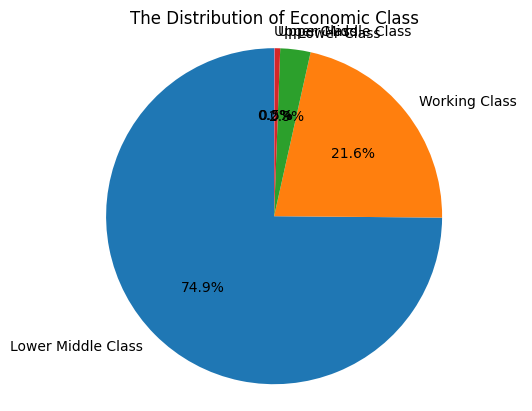

In [60]:
pieeco = df['ecoClass'].value_counts()
pieeco = pd.DataFrame(pieeco).reset_index()
plt.pie(pieeco['count'], labels=pieeco['ecoClass'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('The Distribution of Economic Class')
plt.show()

In [61]:
pieeco

,ecoClass,count
0,Lower Middle Class,1674
1,Working Class,484
2,Lower Class,65
3,Upper Middle Class,12
4,Upper Class,1


* Lower Middle Class: 74.9% / 1674 people 
* Working Class: 21.6% / 484 people

There are the most potential economic class to be targeted in the next campaign

#### COMPARE PARTICIPANT IN EACH CAMPAIGN - EVALUATION 
* We should look into composition of participants per campaign
* This way, we can tell which is the most potential generation to target and which generation gives interest to past campaigns


In [62]:
crossTabGenCmp1 = pd.crosstab(index = df['ecoClass'],
                          columns= df['Promo_10']).reset_index().rename({0 : '0Cmp1', 1 : '1Cmp1'}, axis = 1)
crossTabGenCmp2 = pd.crosstab(index = df['ecoClass'],
                          columns= df['Promo_20']).reset_index().rename({0 : '0Cmp2', 1 : '1Cmp2'}, axis = 1)
crossTabGenCmp3 = pd.crosstab(index = df['ecoClass'],
                          columns= df['Promo_30']).reset_index().rename({0 : '0Cmp3', 1 : '1Cmp3'}, axis = 1)
crossTabGenCmp5 = pd.crosstab(index = df['ecoClass'],
                          columns= df['Promo_50']).reset_index().rename({0 : '0Cmp5', 1 : '1Cmp5'}, axis = 1)
crossTabGenCmpAll = pd.crosstab(index = df['ecoClass'],
                          columns= df['freqJoin'].apply(lambda x: 0 if x == 0 else 1)).reset_index().rename({0 : '0CmpAll', 1 : '1CmpAll'}, axis = 1)
crossTabGenFull = crossTabGenCmp1.merge(crossTabGenCmp2, on='ecoClass') \
                                .merge(crossTabGenCmp3, on='ecoClass') \
                                .merge(crossTabGenCmp5, on='ecoClass') \
                                .merge(crossTabGenCmpAll, on='ecoClass') 
crossTabGenFull = crossTabGenFull.merge(pieeco,'inner','ecoClass')
crossTabGenFull['1Cmp1Prop'] = (crossTabGenFull['1Cmp1'] / crossTabGenFull['count']) * 100
crossTabGenFull['1Cmp2Prop'] = (crossTabGenFull['1Cmp2'] / crossTabGenFull['count']) * 100
crossTabGenFull['1Cmp3Prop'] = (crossTabGenFull['1Cmp3'] / crossTabGenFull['count']) * 100
crossTabGenFull['1Cmp5Prop'] = (crossTabGenFull['1Cmp5'] / crossTabGenFull['count']) * 100
crossTabGenFull['1CmpAllProp'] = (crossTabGenFull['1CmpAll'] / crossTabGenFull['count']) * 100
crossTabGenFull

,ecoClass,0Cmp1,1Cmp1,0Cmp2,1Cmp2,0Cmp3,1Cmp3,0Cmp5,1Cmp5,0CmpAll,1CmpAll,count,1Cmp1Prop,1Cmp2Prop,1Cmp3Prop,1Cmp5Prop,1CmpAllProp
0,Lower Class,65,0,65,0,58,7,65,0,58,7,65,0.000000,0.000000,10.769231,0.000000,10.769231
1,Lower Middle Class,1535,139,1645,29,1552,122,1645,29,1424,250,1674,8.303465,1.732378,7.287933,1.732378,14.934289
2,Upper Class,1,0,1,0,1,0,1,0,1,0,1,0.000000,0.000000,0.000000,0.000000,0.000000
3,Upper Middle Class,8,4,11,1,12,0,11,1,8,4,12,33.333333,8.333333,0.000000,8.333333,33.333333
4,Working Class,484,0,484,0,450,34,484,0,450,34,484,0.000000,0.000000,7.024793,0.000000,7.024793


In [63]:
crossTabGenFullPartiCount = crossTabGenFull[['ecoClass','1Cmp1', '1Cmp2', '1Cmp3', '1Cmp5', '1CmpAll']]
crossTabGenFullPartiCount

,ecoClass,1Cmp1,1Cmp2,1Cmp3,1Cmp5,1CmpAll
0,Lower Class,0,0,7,0,7
1,Lower Middle Class,139,29,122,29,250
2,Upper Class,0,0,0,0,0
3,Upper Middle Class,4,1,0,1,4
4,Working Class,0,0,34,0,34


In [64]:
crossTabGenFullPartiProp = crossTabGenFull[['ecoClass','1Cmp1Prop', '1Cmp2Prop', '1Cmp3Prop', '1Cmp5Prop', '1CmpAllProp']]
crossTabGenFullPartiProp

,ecoClass,1Cmp1Prop,1Cmp2Prop,1Cmp3Prop,1Cmp5Prop,1CmpAllProp
0,Lower Class,0.000000,0.000000,10.769231,0.000000,10.769231
1,Lower Middle Class,8.303465,1.732378,7.287933,1.732378,14.934289
2,Upper Class,0.000000,0.000000,0.000000,0.000000,0.000000
3,Upper Middle Class,33.333333,8.333333,0.000000,8.333333,33.333333
4,Working Class,0.000000,0.000000,7.024793,0.000000,7.024793


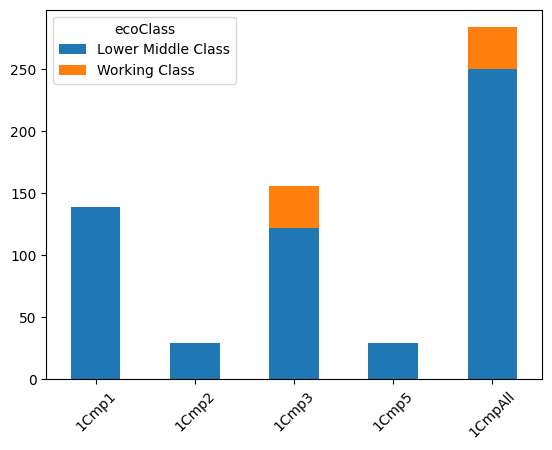

In [65]:
crossTabGenFullPartiCount.iloc[[1,4]].set_index('ecoClass').transpose().plot.bar(stacked = True)
plt.xticks(rotation = 45)
plt.show()

Most of the participant is Lower Middle Class

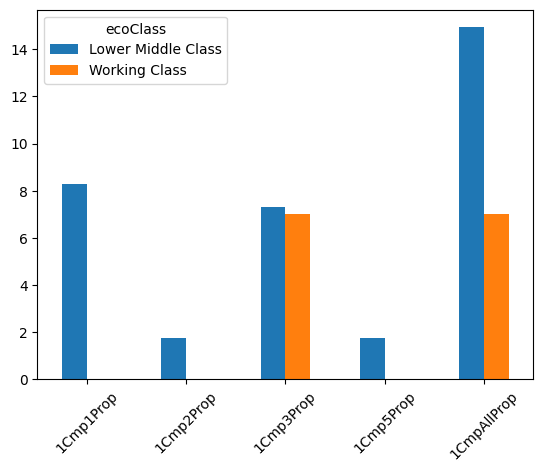

In [66]:
crossTabGenFullPartiProp.iloc[[1,4]].set_index('ecoClass').transpose().plot.bar(stacked = False)
plt.xticks(rotation = 45)
plt.show()

* Most of the campaign interest is towards Lower Middle Class.
* Working Class seems to have interest in 3rd campaign.
* Based on top population, we can conclude that Lower Middle Class has biggest pool and shape the participant per campaign

*All Campaigns?*

In [67]:
filtered_df = df[df['freqJoin'] != 0]
generation_counts = filtered_df['ecoClass'].value_counts()

In [68]:
generation_counts = pd.merge(generation_counts, pieeco, on = 'ecoClass', how = 'inner')
generation_counts['%Percent'] = generation_counts['count_x']*100/generation_counts['count_y']
generation_counts['%Percent'] = generation_counts['%Percent'].sort_values(ascending=False)
generation_counts

,ecoClass,count_x,count_y,%Percent
0,Lower Middle Class,250,1674,14.934289
1,Working Class,34,484,7.024793
2,Lower Class,7,65,10.769231
3,Upper Middle Class,4,12,33.333333


* 14.93% Lower Middle Class / 250 people of 1674 people have particiapted in Campaign
* 7% Working Class / 34 people of 484 people have particiapted in Campaign

*5th Campaign?*

In [69]:
filtered_df = df[df['Promo_50'] != 0]
generation_counts_5 = filtered_df['ecoClass'].value_counts()
generation_counts_5.reset_index()
generation_counts_5 = pd.merge(generation_counts_5, pieeco, on = 'ecoClass', how = 'inner')
generation_counts_5['%Percent'] = generation_counts_5['count_x']*100/generation_counts_5['count_y']
generation_counts_5['%Percent'] = generation_counts_5['%Percent'].sort_values(ascending=False)
generation_counts_5

,ecoClass,count_x,count_y,%Percent
0,Lower Middle Class,29,1674,1.732378
1,Upper Middle Class,1,12,8.333333


* 1.73% Lower Middle Class / 29 people of 1674 people have particiapted in Last Campaign
* 0% Working Class / 0 people of 484 people have particiapted in Last Campaign

*3rd Campaign?*

In [70]:
filtered_df = df[df['Promo_30'] != 0]
generation_counts_3 = filtered_df['ecoClass'].value_counts()
generation_counts_3.reset_index()
generation_counts_3 = pd.merge(generation_counts_3, pieeco, on = 'ecoClass', how = 'inner')
generation_counts_3['%Percent'] = generation_counts_3['count_x']*100/generation_counts_3['count_y']
generation_counts_3['%Percent'] = generation_counts_3['%Percent'].sort_values(ascending=False)
generation_counts_3

,ecoClass,count_x,count_y,%Percent
0,Lower Middle Class,122,1674,7.287933
1,Working Class,34,484,7.024793
2,Lower Class,7,65,10.769231


* 7.29% Lower Middle Class / 122 people of 1674 people have particiapted in Last Campaign
* 7.02% Working Class / 34 people of 484 people have particiapted in Last Campaign

#### OVERALL CONCLUSION OF ECONOMIC CLASS
1. Based on proportion, Lower Middle Class, Working Class have the highest proportion of general Economic Class Demographics. Those 2 are the most potential to be digged on.
2. There's a clear audience targetting at Economic Class, Lower Middle Class. But Working Class seems to participate more in 3rd campaign.

### *FAMILY*

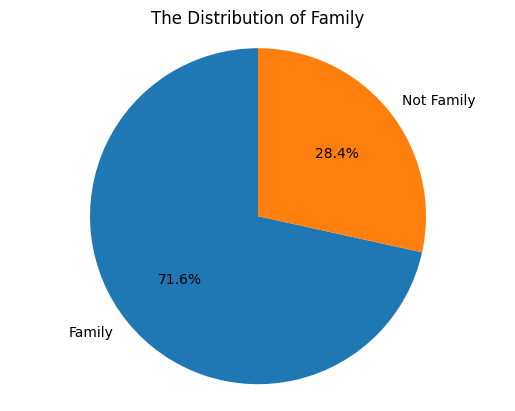

In [71]:
piefam = df['isChildren'].value_counts()
piefam = pd.DataFrame(piefam).reset_index()
plt.pie(piefam['count'], labels=piefam['isChildren'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('The Distribution of Family')
plt.show()

In [72]:
piefam

,isChildren,count
0,Family,1600
1,Not Family,636


FAMILY is the majority of population with 71.6% / 1600 People

#### COMPARE PARTICIPANT IN EACH CAMPAIGN - EVALUATION 
* We should look into composition of participants per campaign
* This way, we can tell which is the most potential generation to target and which generation gives interest to past campaigns


In [73]:
crossTabGenCmp1 = pd.crosstab(index = df['isChildren'],
                          columns= df['Promo_10']).reset_index().rename({0 : '0Cmp1', 1 : '1Cmp1'}, axis = 1)
crossTabGenCmp2 = pd.crosstab(index = df['isChildren'],
                          columns= df['Promo_20']).reset_index().rename({0 : '0Cmp2', 1 : '1Cmp2'}, axis = 1)
crossTabGenCmp3 = pd.crosstab(index = df['isChildren'],
                          columns= df['Promo_30']).reset_index().rename({0 : '0Cmp3', 1 : '1Cmp3'}, axis = 1)
crossTabGenCmp5 = pd.crosstab(index = df['isChildren'],
                          columns= df['Promo_50']).reset_index().rename({0 : '0Cmp5', 1 : '1Cmp5'}, axis = 1)
crossTabGenCmpAll = pd.crosstab(index = df['isChildren'],
                          columns= df['freqJoin'].apply(lambda x: 0 if x == 0 else 1)).reset_index().rename({0 : '0CmpAll', 1 : '1CmpAll'}, axis = 1)
crossTabGenFull = crossTabGenCmp1.merge(crossTabGenCmp2, on='isChildren') \
                                .merge(crossTabGenCmp3, on='isChildren') \
                                .merge(crossTabGenCmp5, on='isChildren') \
                                .merge(crossTabGenCmpAll, on='isChildren') 
crossTabGenFull = crossTabGenFull.merge(piefam,'inner','isChildren')
crossTabGenFull['1Cmp1Prop'] = (crossTabGenFull['1Cmp1'] / crossTabGenFull['count']) * 100
crossTabGenFull['1Cmp2Prop'] = (crossTabGenFull['1Cmp2'] / crossTabGenFull['count']) * 100
crossTabGenFull['1Cmp3Prop'] = (crossTabGenFull['1Cmp3'] / crossTabGenFull['count']) * 100
crossTabGenFull['1Cmp5Prop'] = (crossTabGenFull['1Cmp5'] / crossTabGenFull['count']) * 100
crossTabGenFull['1CmpAllProp'] = (crossTabGenFull['1CmpAll'] / crossTabGenFull['count']) * 100
crossTabGenFull

,isChildren,0Cmp1,1Cmp1,0Cmp2,1Cmp2,0Cmp3,1Cmp3,0Cmp5,1Cmp5,0CmpAll,1CmpAll,count,1Cmp1Prop,1Cmp2Prop,1Cmp3Prop,1Cmp5Prop,1CmpAllProp
0,Family,1566,34,1588,12,1485,115,1588,12,1448,152,1600,2.125000,0.750000,7.18750,0.750000,9.500000
1,Not Family,527,109,618,18,588,48,618,18,493,143,636,17.138365,2.830189,7.54717,2.830189,22.484277


In [74]:
crossTabGenFullPartiCount = crossTabGenFull[['isChildren','1Cmp1', '1Cmp2', '1Cmp3', '1Cmp5', '1CmpAll']]
crossTabGenFullPartiCount

,isChildren,1Cmp1,1Cmp2,1Cmp3,1Cmp5,1CmpAll
0,Family,34,12,115,12,152
1,Not Family,109,18,48,18,143


In [75]:
crossTabGenFullPartiProp = crossTabGenFull[['isChildren','1Cmp1Prop', '1Cmp2Prop', '1Cmp3Prop', '1Cmp5Prop', '1CmpAllProp']]
crossTabGenFullPartiProp

,isChildren,1Cmp1Prop,1Cmp2Prop,1Cmp3Prop,1Cmp5Prop,1CmpAllProp
0,Family,2.125000,0.750000,7.18750,0.750000,9.500000
1,Not Family,17.138365,2.830189,7.54717,2.830189,22.484277


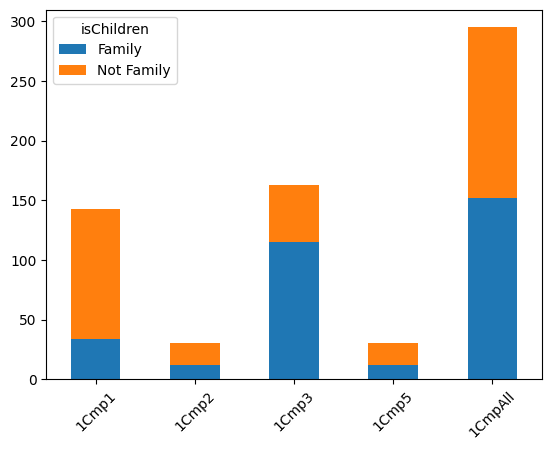

In [76]:
crossTabGenFullPartiCount.set_index('isChildren').transpose().plot.bar(stacked = True)
plt.xticks(rotation = 45)
plt.show()

FAMILY participate more than NOT FAMILY

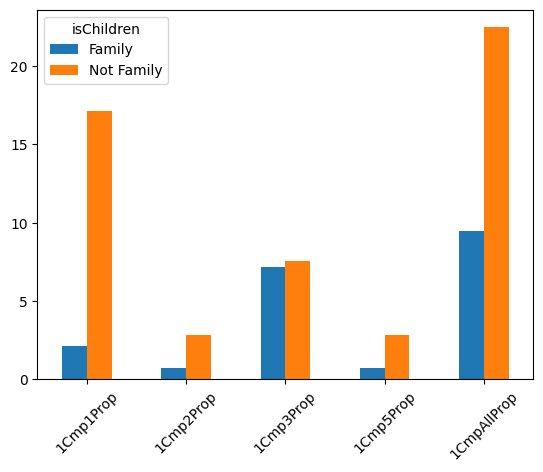

In [77]:
crossTabGenFullPartiProp.set_index('isChildren').transpose().plot.bar(stacked = False)
plt.xticks(rotation = 45)
plt.show()

The campaign seems to take interest to NOT FAMILY

Meanwhile, the biggest and potential pool is Family.

*All Campagns?*

In [78]:
filtered_df = df[df['freqJoin'] != 0]
generation_counts = filtered_df['isChildren'].value_counts()

In [79]:
generation_counts = pd.merge(generation_counts, piefam, on = 'isChildren', how = 'inner')
generation_counts['%Percent'] = generation_counts['count_x']*100/generation_counts['count_y']
generation_counts['%Percent'] = generation_counts['%Percent'].sort_values(ascending=False)
generation_counts

,isChildren,count_x,count_y,%Percent
0,Family,152,1600,9.500000
1,Not Family,143,636,22.484277


*5th Campaign?*

In [80]:
filtered_df = df[df['Promo_50'] != 0]
generation_counts_5 = filtered_df['isChildren'].value_counts()
generation_counts_5.reset_index()
generation_counts_5 = pd.merge(generation_counts_5, piefam, on = 'isChildren', how = 'inner')
generation_counts_5['%Percent'] = generation_counts_5['count_x']*100/generation_counts_5['count_y']
generation_counts_5['%Percent'] = generation_counts_5['%Percent'].sort_values(ascending=False)
generation_counts_5

,isChildren,count_x,count_y,%Percent
0,Not Family,18,636,2.830189
1,Family,12,1600,0.750000


* 0.75% Family / 12 people of 1600 people have particiapted in Campaign
* 2.83% Not Family / 18 people of 636 people have participated in Campaign

*3rd Campaign?*

In [81]:
filtered_df = df[df['Promo_30'] != 0]
generation_counts_3 = filtered_df['isChildren'].value_counts()
generation_counts_3.reset_index()
generation_counts_3 = pd.merge(generation_counts_3, piefam, on = 'isChildren', how = 'inner')
generation_counts_3['%Percent'] = generation_counts_3['count_x']*100/generation_counts_3['count_y']
generation_counts_3['%Percent'] = generation_counts_3['%Percent'].sort_values(ascending=False)
generation_counts_3

,isChildren,count_x,count_y,%Percent
0,Family,115,1600,7.18750
1,Not Family,48,636,7.54717


* 7.19% Family / 115 people of 1600 people have particiapted in Campaign
* 7.55% Not Family / 48 people of 636 people have participated in Campaign

#### OVERALL CONCLUSION OF FAMILY
* Based on proportion, Family has the highest proportion of general Family Type Demographics.
* There's a clear audience targetting at Family Type, being Not Family. But not targeting the largest pool, which is Family.

## DEMOGRAPHIC CONCLUSION

#### Participation Rates - Evaluation
Let's see which category participate the most out of demography.
We can see it by calculating Mean for every category based on total participation. Lowest range is 0 (the category has never participated in any campaign).
Highest range is 5 (the category has always participated in all campaingns)


In [82]:
prGen = df[df['freqJoin']!=0].groupby('Generation')['freqJoin'].mean().sort_values(ascending = False)[:3].to_frame().reset_index()
prGen

,Generation,freqJoin
0,Gen Z,1.461538
1,Millennials,1.244186
2,Gen X,1.083333


<Axes: xlabel='Generation', ylabel='freqJoin'>

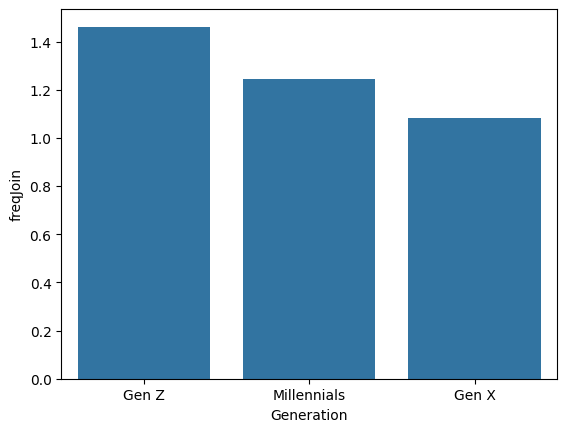

In [83]:
sns.barplot(prGen, x = 'Generation', y = 'freqJoin')

In [84]:
topGen = ['Gen Z','Millennials', 'Gen X']

GenZ tends to participate more in the campaign; meanwhile, Gen X is the lowest.

In [85]:
prEdu = df[df['freqJoin']!=0].groupby('Academic_Level')['freqJoin'].mean().sort_values(ascending = False)[:3].to_frame().reset_index()
prEdu

,Academic_Level,freqJoin
0,PhD,1.250000
1,Graduation,1.248366
2,Master,1.234375


<Axes: xlabel='Academic_Level', ylabel='freqJoin'>

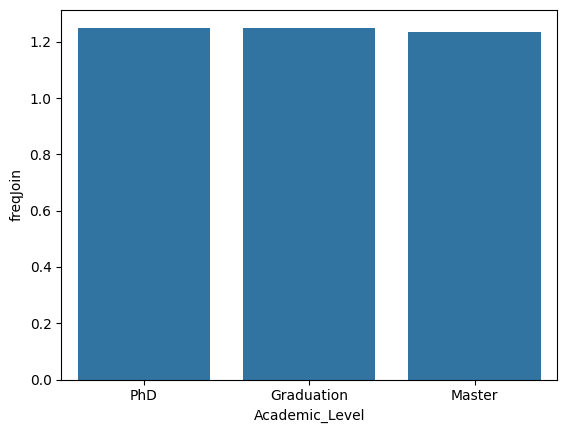

In [86]:
sns.barplot(prEdu, x = 'Academic_Level', y = 'freqJoin')

In [87]:
topEdu = ['PhD','Graduation','Master']

PhD tends to participate more in the campaign; meanwhile, Master is the lowest.

In [88]:
prSta = df[df['freqJoin']!=0].groupby('Status')['freqJoin'].mean().sort_values(ascending = False).to_frame().reset_index()
prSta

,Status,freqJoin
0,Divorced,1.354839
1,Together,1.328571
2,Widow,1.222222
3,Married,1.196581
4,Single,1.176471


In [89]:
topMarital = ['Single','Married','Together']

Together tends to participate more in the campaign;
meanwhile, Single is the lowest.But, if we assume Married and Together is the same, Single is the smallest

In [90]:
preco = df[df['freqJoin']!=0].groupby('ecoClass')['freqJoin'].mean().sort_values(ascending = False).to_frame().reset_index()
preco

,ecoClass,freqJoin
0,Upper Middle Class,1.500
1,Lower Middle Class,1.276
2,Lower Class,1.000
3,Working Class,1.000


In [91]:
topEco = ['Lower Middle Class','Working Class']

Lower Middle Class tends to participate more in the campaign;
meanwhile, Working Class is the lowest

In [92]:
prefam = df[df['freqJoin']!=0].groupby('isChildren')['freqJoin'].mean().sort_values(ascending = False).to_frame().reset_index()
prefam

,isChildren,freqJoin
0,Not Family,1.349650
1,Family,1.138158


<Axes: xlabel='isChildren', ylabel='freqJoin'>

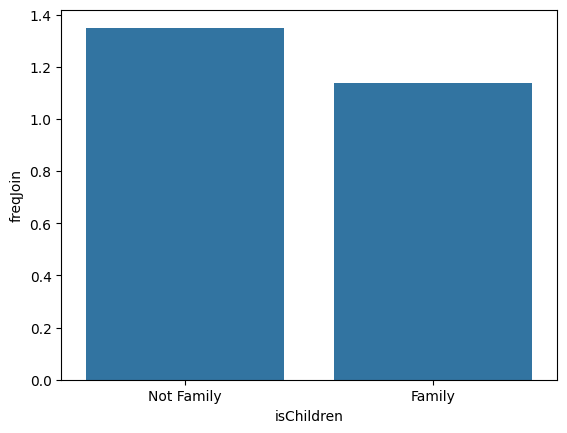

In [93]:
sns.barplot(prefam, x = 'isChildren', y = 'freqJoin')

Not Family Class tends to participate more in the campaign; meanwhile, Family is the lowest

* Most of the categories that took interest in the past campaigns were not the most potential pool of categories.
* This could be the cause why the campaign didn't catch much participant.

### Population Demography Summary

Graphs below are top potential category per demography
Taken from prior analysis.

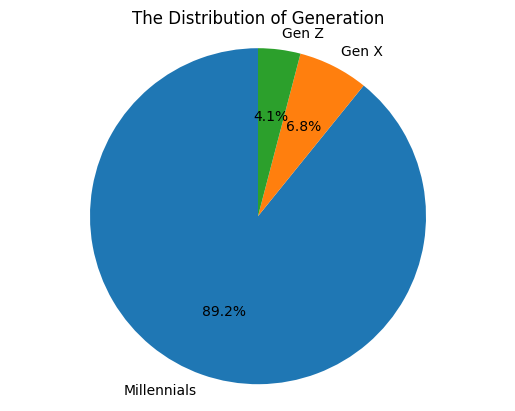

In [94]:
plt.pie(piegen['count'], labels=piegen['Generation'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('The Distribution of Generation')
plt.show()

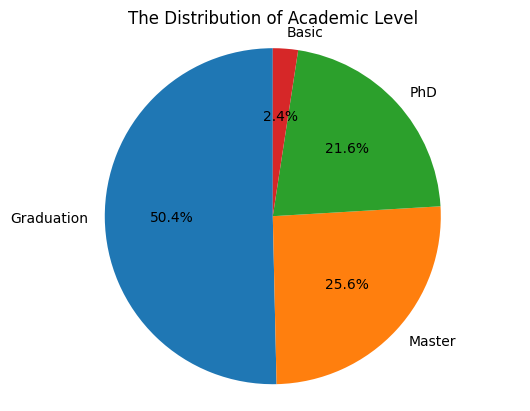

In [95]:
plt.pie(pieedu['count'], labels=pieedu['Academic_Level'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('The Distribution of Academic Level')
plt.show()

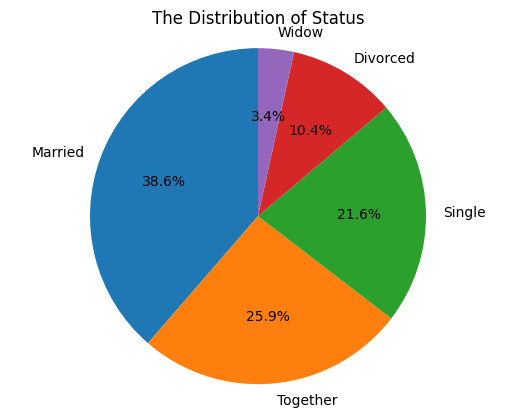

In [96]:
plt.pie(piestatus['count'], labels=piestatus['Status'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('The Distribution of Status')
plt.show()

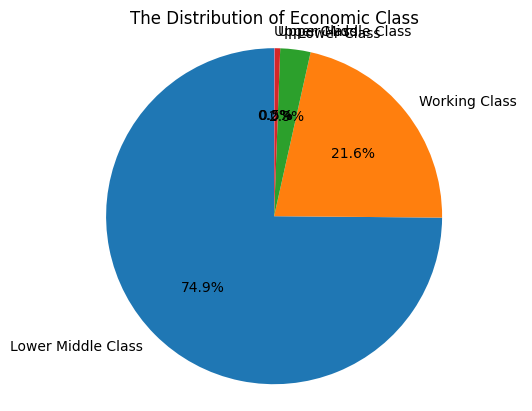

In [97]:
plt.pie(pieeco['count'], labels=pieeco['ecoClass'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('The Distribution of Economic Class')
plt.show()

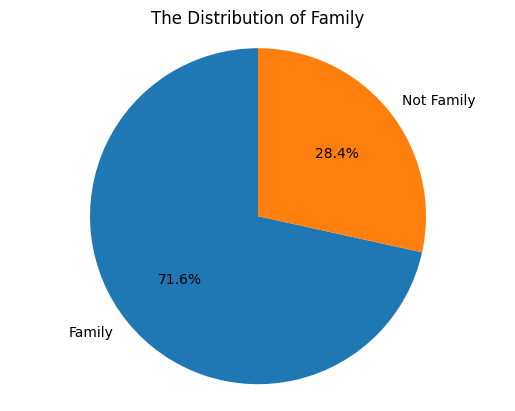

In [98]:
plt.pie(piefam['count'], labels=piefam['isChildren'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('The Distribution of Family')
plt.show()

**The Highest Proportion based on these graphs**
1. Millennials (89.2%)
2. Graduation (50.4%)
3. Married (38.6%) and Together (25.9%) = (64.5%)
4. Lower Middle Class (74.9%)
5. Family (71.6%)

Again, these categories are the most potential to be targeted if we want larger audience

#### Sample Demographic
Based on demographic conclusion, we already know which category that stands out per demography

Let's try to count the combination of each category.

In [99]:
dictComb = {'combination' : [],
            'countN' : []}

for i in df['Generation'].unique() :
    for k in df['Academic_Level'].unique() :
        for m in df['Status'].unique() :
            for n in df['ecoClass'].unique() :
                for o in df['isChildren'].unique() :
                    countN = df[(df['Generation'] == i)
                                    & (df['Academic_Level'] == k)
                                    & (df['Status'] == m)
                                    & (df['ecoClass'] == n)
                                    & (df['isChildren'] == o)]['ID'].count()
                    for p in dictComb :
                        if p == 'combination' :
                            dictComb[p].append([i , k , m , n , o])
                        else :
                            dictComb[p].append(countN)

dfComb = pd.DataFrame(dictComb)
dfComb.sort_values('countN', ascending=False)

,combination,countN
0,"[Millennials, Graduation, Married, Lower Middl...",198
20,"[Millennials, Graduation, Together, Lower Midd...",133
50,"[Millennials, Master, Married, Lower Middle Cl...",104
100,"[Millennials, PhD, Married, Lower Middle Class...",104
10,"[Millennials, Graduation, Single, Lower Middle...",99
...,...,...
277,"[Gen X, Master, Together, Upper Middle Class, ...",0
276,"[Gen X, Master, Together, Upper Middle Class, ...",0
275,"[Gen X, Master, Together, Lower Class, Not Fam...",0
274,"[Gen X, Master, Together, Lower Class, Family]",0


In [100]:
dfComb.to_csv('dfComb.csv', index=False)

**If we get all the highest demographics combined, we only get 198 People at max**

So, it better to make hierarchy or priority which Demography we should focus on more.

But, still the higest demography combined match the result from analysis per demography.

The priority should follow:

1. Millennials (89.2%)
2. Graduation (50.4%)
3. Married (38.6%) and Together (25.9%) = (64.5%)
4. Lower Middle Class (74.9%)
5. Family (71.6%)

### IS DISCOUNT NEED?
**Discount Overview**

Discount is important element to supermarket activity

We should consider whether discount can be integrated to the campaign

In [101]:
dictHaveDisc = {'isParticDisc' : ['Y','N'],
                'countDisc': [df[df['Num_Deals_Purchases'] != 0]['ID'].count(),df[df['Num_Deals_Purchases'] == 0]['ID'].count()]}

dfHaveDisc = pd.DataFrame(dictHaveDisc)
dfHaveDisc

,isParticDisc,countDisc
0,Y,2190
1,N,46


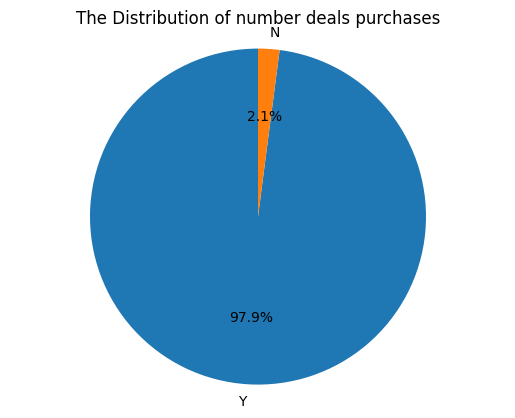

In [102]:
plt.pie(dfHaveDisc['countDisc'], labels=dfHaveDisc['isParticDisc'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('The Distribution of number deals purchases')
plt.show()

Discount might NEEDED because most of the population has ever bougth when price is discounted

In [103]:
discRate = (df['Num_Deals_Purchases'].sum() / df['frePurchase'].sum()) * 100
f'{round(discRate)}%'

'16%'

* But, based on ratio to purchase made, purchase on discount is quite small. Only 16% it means only 1 purchase made with discount out of 6 purchase. But, this could because the discounted items were not needed items by the population. So, not many purchase made with discount.
* We CAN'T conclude which product is the best based on this data because the data only tells amount spent on products (USD).  But we still can choose discounted products based on Demographics needs to boost participation in campaign.
* As we concluded before, discount can also made as a tool to target the audience.

## Channel of Purchase

numWebPurchase        2187
numCatalogPurchase    1650
numStorePurchase      2221
dtype: int64


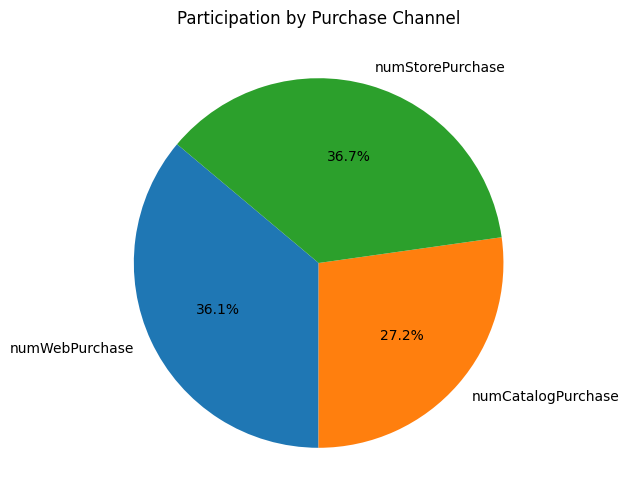

In [104]:
particChannel = pd.Series({
    'numWebPurchase': df[df['Num_Web_Purchases'] != 0]['ID'].count(),
    'numCatalogPurchase': df[df['Num_Catalog_Purchases'] != 0]['ID'].count(),
    'numStorePurchase': df[df['Num_Store_Purchases'] != 0]['ID'].count()
})

# Display the Series and plot the pie chart
print(particChannel)
plt.figure(figsize=(8, 6))
plt.pie(particChannel, labels=particChannel.index, autopct='%1.1f%%', startangle=140)
plt.title('Participation by Purchase Channel')
plt.show()

Web and Store is the most used channel of purchase

Num_Web_Purchases         9129.0
Num_Catalog_Purchases     5946.0
Num_Store_Purchases      12945.0
dtype: float64


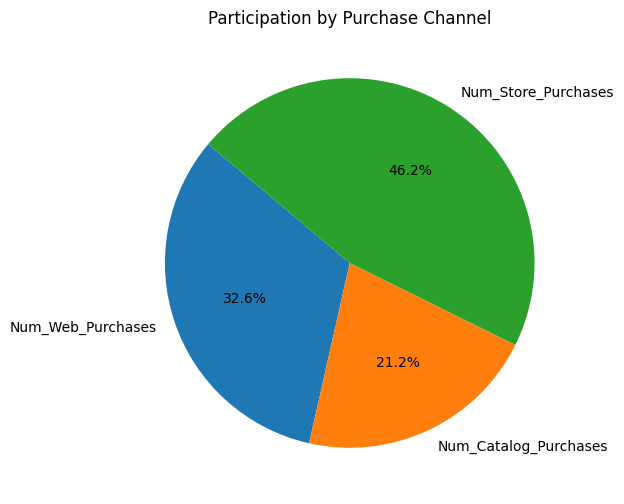

In [105]:
purchChannelAll = df[['Num_Web_Purchases','Num_Catalog_Purchases','Num_Store_Purchases']].sum()
# Display the Series and plot the pie chart
print(purchChannelAll )
plt.figure(figsize=(8, 6))
plt.pie(purchChannelAll , labels=purchChannelAll .index, autopct='%1.1f%%', startangle=140)
plt.title('Participation by Purchase Channel')
plt.show()

Store generates most purchase out of all channels.

,Generation,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases
0,Gen X,3.894040,2.907285,5.880795
1,Gen Z,3.978022,2.626374,5.670330
2,Millennials,4.101805,2.641926,5.787864


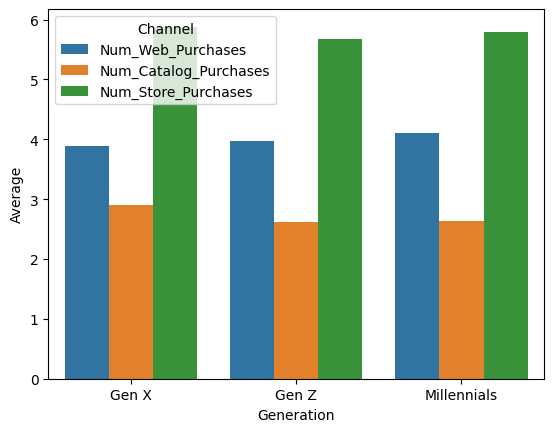

In [106]:
purchChannelGen = df.groupby('Generation')[['Num_Web_Purchases','Num_Catalog_Purchases','Num_Store_Purchases']].mean().reset_index()
sns.barplot(data = purchChannelGen.melt(id_vars = 'Generation',
                                        var_name = 'Channel',
                                        value_name = 'Average'),
            x = 'Generation',
            y = 'Average',
            hue = 'Channel')
purchChannelGen

,Academic_Level,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases
0,Basic,1.888889,0.481481,2.851852
1,Graduation,4.125222,2.719361,5.828597
2,Master,3.926573,2.477273,5.758741
3,PhD,4.413223,2.977273,6.061983


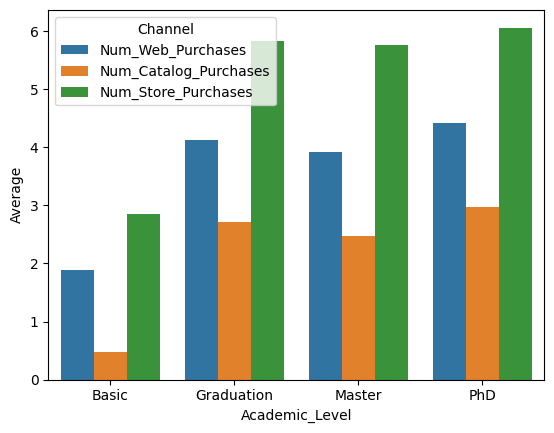

In [107]:
purchChannelEdu = df.groupby('Academic_Level')[['Num_Web_Purchases','Num_Catalog_Purchases','Num_Store_Purchases']].mean().reset_index()
sns.barplot(data = purchChannelEdu.melt(id_vars = 'Academic_Level',
                                        var_name = 'Channel',
                                        value_name = 'Average'),
            x = 'Academic_Level',
            y = 'Average',
            hue = 'Channel')
purchChannelEdu

,Status,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases
0,Divorced,4.310345,2.672414,5.818966
1,Married,4.087963,2.625000,5.850694
2,Single,3.879917,2.587992,5.629400
3,Together,4.081034,2.675862,5.736207
4,Widow,4.623377,3.324675,6.415584


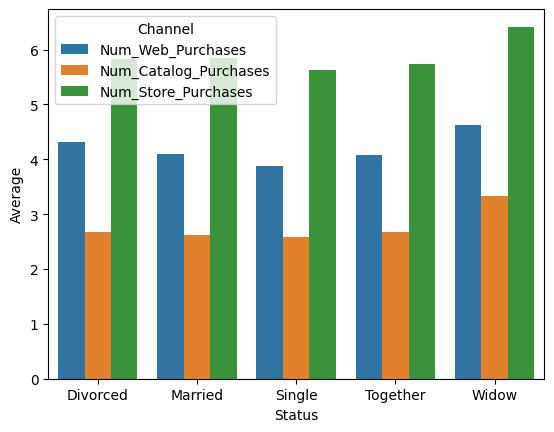

In [108]:
purchChannelSta = df.groupby('Status')[['Num_Web_Purchases','Num_Catalog_Purchases','Num_Store_Purchases']].mean().reset_index()
sns.barplot(data = purchChannelSta.melt(id_vars = 'Status',
                                        var_name = 'Channel',
                                        value_name = 'Average'),
            x = 'Status',
            y = 'Average',
            hue = 'Channel')
purchChannelSta

,ecoClass,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases
0,Lower Class,2.323077,0.861538,2.353846
1,Lower Middle Class,4.762246,3.329749,6.730585
2,Upper Class,3.000000,1.000000,3.000000
3,Upper Middle Class,4.666667,9.333333,4.333333
4,Working Class,1.956612,0.419421,3.037190


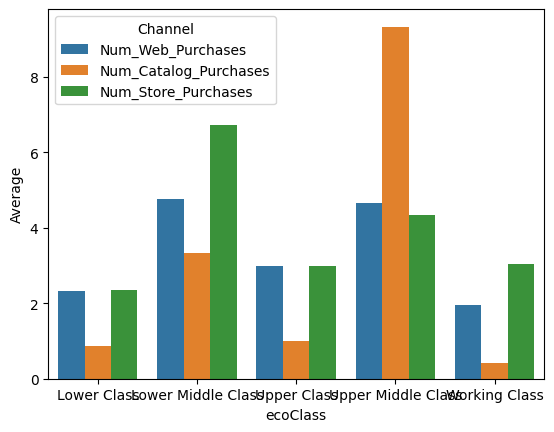

In [109]:
purchChannelEco = df.groupby('ecoClass')[['Num_Web_Purchases','Num_Catalog_Purchases','Num_Store_Purchases']].mean().reset_index()
sns.barplot(data = purchChannelEco.melt(id_vars = 'ecoClass',
                                        var_name = 'Channel',
                                        value_name = 'Average'),
            x = 'ecoClass',
            y = 'Average',
            hue = 'Channel')
purchChannelEco

,isChildren,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases
0,Family,3.958125,1.828125,5.201875
1,Not Family,4.396226,4.750000,7.267296


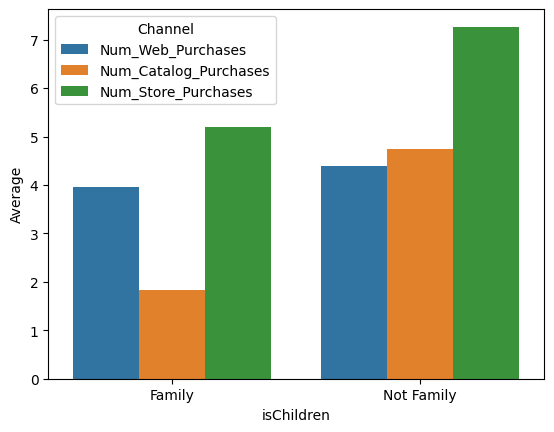

In [110]:
purchChannelFam = df.groupby('isChildren')[['Num_Web_Purchases','Num_Catalog_Purchases','Num_Store_Purchases']].mean().reset_index()
sns.barplot(data = purchChannelFam.melt(id_vars = 'isChildren',
                                        var_name = 'Channel',
                                        value_name = 'Average'),
            x = 'isChildren',
            y = 'Average',
            hue = 'Channel')
purchChannelFam

* Despite all demography classes, all favorites Store as channel of purchase.
Then followed by Web as their second choice of purchase channel.

* It means, we should mainly boost the campaign in store to attract more participant.
Then, if we have enough budget we can also consider web as secondary channel to boost our campaign.

* The grand design should still match the highest demography pool as always mentioned before.

## Performing Clustering by RFM Score using RFM Dataset
In this section, I aim to harness RFM metrics to conduct cluster analysis, allowing us to group customers based on their purchasing behavior and financial contributions.

In [111]:
# Initialize the rfm DataFrame
rfm = pd.DataFrame()
# Recency
rfm['Recency'] = df['Recency']
# Frequency
rfm['Frequency'] = df['Num_Deals_Purchases'] + df['Num_Catalog_Purchases'] + df['Num_Store_Purchases'] + df['Num_Web_Purchases']
# Monetary
rfm['Monetary'] = df['Liquor'] + df['Vegetables'] + df['Pork'] + df['Seafood'] + df['Candy'] + df['Jewellery']

# Check the dataframe
rfm

,Recency,Frequency,Monetary
0,37.0,31.0,1105.0
1,92.0,21.0,738.0
2,65.0,27.0,1318.0
3,12.0,7.0,67.0
4,55.0,33.0,1665.0
...,...,...,...
2231,51.0,7.0,36.0
2232,74.0,10.0,140.0
2233,30.0,20.0,764.0
2234,94.0,29.0,1112.0


In [112]:
# Statistics
rfm.describe()

,Recency,Frequency,Monetary
count,2236.000000,2236.000000,2236.000000
mean,49.147138,14.854204,608.436047
std,28.954880,7.681422,602.507355
min,0.000000,0.000000,8.000000
25%,24.000000,8.000000,71.000000
50%,49.000000,15.000000,398.500000
75%,74.000000,21.000000,1047.250000
max,99.000000,44.000000,2528.000000


In [113]:
rfm_df = rfm.copy()

In [114]:
# Calculating RFM Scores to performing clusters.
rfm_df.loc[:, 'recency_score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df.loc[:, 'frequency_score'] = pd.qcut(rfm_df['Frequency'], 5, labels=[1, 2, 3, 4, 5])
rfm_df.loc[:, 'monetary_score'] = pd.qcut(rfm_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])
rfm_df.loc[:, 'RFM_SCORE'] = (rfm_df['recency_score'].astype(str) + rfm_df['frequency_score'].astype(str))
rfm_df.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
0,37.0,31.0,1105.0,4,5,4,45
1,92.0,21.0,738.0,1,4,4,14
2,65.0,27.0,1318.0,2,5,5,25
3,12.0,7.0,67.0,5,1,2,51
4,55.0,33.0,1665.0,3,5,5,35


In [115]:
# Clusters by RFM Score
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [116]:
# Performing calculations
rfm_df.loc[:,'segment'] = rfm_df['RFM_SCORE'].replace(seg_map, regex=True)
rfm_df[['segment', 'Recency', 'Frequency', 'Monetary']].groupby('segment').agg(['mean', 'count'])

Recency        Frequency           Monetary      
                          mean count       mean count         mean count
segment                                                                 
about_to_sleep       49.377049   183   6.852459   183    80.338798   183
at_Risk              78.586842   380  17.465789   380   880.692105   380
cant_loose           80.062893   159  25.981132   159  1208.918239   159
champions             9.267857   168  22.952381   168  1072.773810   168
hibernating          80.162319   345   7.031884   345    86.857971   345
loyal_customers      39.849432   352  23.181818   352  1118.639205   352
need_attention       50.141176    85  14.929412    85   654.764706    85
new_customers         9.491525   118   5.381356   118    50.703390   118
potential_loyalists  19.014837   337  12.646884   337   441.142433   337
promising            29.669725   109   5.357798   109    42.422018   109

In [120]:
rfm_df

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,37.0,31.0,1105.0,4,5,4,45,loyal_customers
1,92.0,21.0,738.0,1,4,4,14,at_Risk
2,65.0,27.0,1318.0,2,5,5,25,cant_loose
3,12.0,7.0,67.0,5,1,2,51,new_customers
4,55.0,33.0,1665.0,3,5,5,35,loyal_customers
...,...,...,...,...,...,...,...,...
2231,51.0,7.0,36.0,3,1,1,31,about_to_sleep
2232,74.0,10.0,140.0,2,2,2,22,hibernating
2233,30.0,20.0,764.0,4,4,4,44,loyal_customers
2234,94.0,29.0,1112.0,1,5,4,15,cant_loose


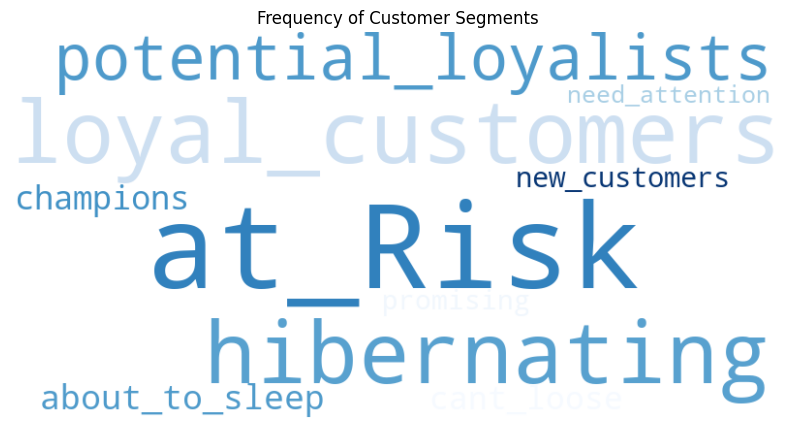

In [121]:
# Count occurrences of each segment
segment_counts = rfm_df['segment'].value_counts()

# Convert counts to a dictionary for the word cloud
segment_dict = segment_counts.to_dict()

# Create a word cloud using segment frequencies
wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='Blues',  # Change the colormap as needed
    max_words=100
).generate_from_frequencies(segment_dict)

# Plotting the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Frequency of Customer Segments')
plt.show()

In [119]:
segment_counts = rfm_df['segment'].value_counts().reset_index()
segment_counts.columns = ['segment', 'count']
total_count = segment_counts['count'].sum()
segment_counts['percentage'] = (segment_counts['count'] / total_count) * 100

# Create text labels
segment_counts['text'] = segment_counts.apply(
    lambda row: f"{row['segment']}<br>{row['count']} ({row['percentage']:.2f}%)", axis=1
)

# Create treemap chart with custom text labels and updated color scale
fig = px.treemap(
    segment_counts,
    path=['segment'],
    values='count',
    color='count',
    color_continuous_scale='Viridis',  # Try other scales like 'Plasma', 'Turbo', or 'Cividis'
    title='Distribution of Customer Segments',
    custom_data=['text']
)

# Update layout for better readability and display custom text
fig.update_traces(
    texttemplate='%{customdata[0]}',
    textinfo='label+text'
)
fig.update_layout(
    template='plotly_white',
    font=dict(size=14)
)

# Show the figure
fig.show()

Customer Segments Distribution:

* At Risk (16.99%): These customers are close to churning. Re-engagement strategies like personalized offers or discounts can help retain them.
* Loyal Customers (15.74%): Regular customers who should be rewarded with exclusive deals or loyalty programs to maintain their engagement.
* Hibernating (15.43%): Inactive customers who may need tailored promotions to rekindle their interest in the brand.
* Potential Loyalists (15.07%): These customers have potential to become loyal. Nurture them with targeted campaigns to encourage repeat purchases.
* Champions (7.51%): Top-performing customers who should receive VIP treatment with rewards and personalized experiences to keep them engaged.
* About to Sleep (8.18%): These customers need reactivation campaigns to prevent them from becoming inactive.
* Can't Lose (7.11%): High-value customers who require special care, such as personalized services and offers to ensure they remain loyal.*  * * * Promising (4.87%): Newer customers showing potential. Nurture them with engagement strategies like personalized recommendations and follow-up offers.

# Overall Conclusion and Recommendation

## Evaluation

Based on the demographic analysis (proportion and rate of participation), we know that the past campaigns focused more on:

- **Generation**: GenX
- **Education**: PhD
- **Marital Status**: Single
- **Economic Class**: Lower Middle Class
- **Family Status**: Not Family

### Discount Analysis
A discount might be needed because almost everyone has ever bought at a discount. However, the purchase ratio in total is small, at **16%**. This could be because the discounted items didn't match the needs of the consumers, only attracting the Working Class and Family, while the Working Class is not the highest population among other Economic Classes.

### Channel of Purchase Analysis
Despite demographic types, the most favored channel of purchase is **Store**, followed by **Web**.

### RFM Analysis Insights
- **High-Value Segments**: Segments like `loyal_customers` and `potential_loyalists` are valuable for growth, while `champions` represent the highest value despite their smaller numbers.
- **At-Risk and Hibernating Segments**: These groups are significant in size, highlighting a need for targeted re-engagement strategies to reduce churn.

## Conclusion
Based on demographic analysis, we find that some categories have a higher proportion of the population than others:

### Highest Proportion of Population
- **Millennials**: 89.2%
- **Graduation**: 50.4%
- **Married**: 38.6% and **Together**: 25.9% (Total: 64.5%)
- **Lower Middle Class**: 74.9%
- **Family**: 71.6%

These categories are the most potential to be targeted if we want a larger audience. We should prioritize which demographic type we should aim for more in the campaign, ranked as follows:

1. Lower Middle Class
2. Families
3. Millennials
4. Couples (Married and Together)
5. Graduates

If we combine all these equally, we only get **198 participants** at most, which is still the highest among other combinations.

Discounts can also be used to attract or target more participants since almost everyone has bought at a discount.

For the channel of purchase, all demographic types favor the **Store** as their main channel of purchase.

## Recommendation

### Target Audience
My main audience should be the **Lower Middle Class** with families (kids/teens at home). We can also include other demographic types like couples (Married and Together), Graduates, and Millennials to enhance our campaign.

### Discount Strategy
The discounted items should meet the needs of our primary audience, especially the **Lower Middle Class** with families (kids/teens at home).

### Channel Strategy
We should boost our campaign primarily in-store, then consider boosting it on our website as our secondary channel of purchase if budget permits.

### RFM-Based Actions
Retain Loyal Customers: Offer exclusive deals, personalized experiences, and rewards to keep loyal customers, champions, and potential loyalists engaged.

Bring Back At-Risk & Hibernating Customers: Create special campaigns with limited-time discounts and product bundles to win back their attention.

Support New & Promising Customers: Provide welcome offers, personalized product suggestions, and follow-ups to turn them into loyal buyers.

Take Care of “Can't Lose” Customers: Give them VIP perks, excellent service, and tailored offers to ensure they stay satisfied and loyal.
